In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

# Carregando Dados e Lendo

Dados do arquivo dadosRH.csv 

In [2]:
dadosRH = pd.read_csv('dadosRH.csv')
dadosRH

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Tecnologia,Sudeste,Superior,M,Outsourcing,1,48,3.0,17,0
54804,74592,Logistica,Nordeste,Mestrado ou Doutorado,F,Outro,1,37,2.0,6,0
54805,13918,Analytics,Sudeste,Superior,M,Outro,1,27,5.0,3,0
54806,13614,Marketing,Nordeste,NaN,M,Outsourcing,1,29,1.0,2,0


In [3]:
dadosRH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_funcionario       54808 non-null  int64  
 1   departmento          54808 non-null  object 
 2   regiao               54808 non-null  object 
 3   educacao             52399 non-null  object 
 4   genero               54808 non-null  object 
 5   canal_recrutamento   54808 non-null  object 
 6   numero_treinamentos  54808 non-null  int64  
 7   idade                54808 non-null  int64  
 8   aval_ano_anterior    50684 non-null  float64
 9   tempo_servico        54808 non-null  int64  
 10  promovido            54808 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 4.6+ MB


In [4]:
dadosRH.describe()

,id_funcionario,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000


# Análise Exploratória, Limpeza e Tranformação dos dados

In [5]:
dadosRH.isnull().sum()

id_funcionario            0
departmento               0
regiao                    0
educacao               2409
genero                    0
canal_recrutamento        0
numero_treinamentos       0
idade                     0
aval_ano_anterior      4124
tempo_servico             0
promovido                 0
dtype: int64

In [6]:
dadosRH.groupby(['educacao']).count()

,id_funcionario,departmento,regiao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
educacao,,,,,,,,,,
Ensino Medio,805,805,805,805,805,805,805,458,805,805
Mestrado ou Doutorado,14925,14925,14925,14925,14925,14925,14925,14798,14925,14925
Superior,36669,36669,36669,36669,36669,36669,36669,33404,36669,36669


<AxesSubplot:xlabel='educacao', ylabel='count'>

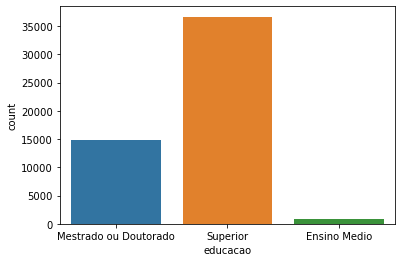

In [7]:
sns.countplot(x = dadosRH['educacao'])

In [8]:
dadosRH.groupby(['aval_ano_anterior']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,tempo_servico,promovido
aval_ano_anterior,,,,,,,,,,
1.0,6223,6223,6223,5887,6223,6223,6223,6223,6223,6223
2.0,4225,4225,4225,4035,4225,4225,4225,4225,4225,4225
3.0,18618,18618,18618,17867,18618,18618,18618,18618,18618,18618
4.0,9877,9877,9877,9509,9877,9877,9877,9877,9877,9877
5.0,11741,11741,11741,11362,11741,11741,11741,11741,11741,11741


<AxesSubplot:xlabel='aval_ano_anterior', ylabel='count'>

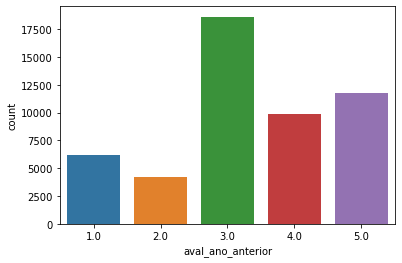

In [9]:
sns.countplot(x = dadosRH['aval_ano_anterior'])

In [10]:
dadosRH['educacao'].fillna(dadosRH['educacao'].mode()[0],inplace=True)

In [11]:
dadosRH['aval_ano_anterior'].fillna(dadosRH['aval_ano_anterior'].median(),inplace=True)

In [12]:
dadosRH.isnull().sum()

id_funcionario         0
departmento            0
regiao                 0
educacao               0
genero                 0
canal_recrutamento     0
numero_treinamentos    0
idade                  0
aval_ano_anterior      0
tempo_servico          0
promovido              0
dtype: int64

In [13]:
dadosRH.groupby(['promovido']).count()

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico
promovido,,,,,,,,,,
0,50140,50140,50140,50140,50140,50140,50140,50140,50140,50140
1,4668,4668,4668,4668,4668,4668,4668,4668,4668,4668


<AxesSubplot:xlabel='promovido', ylabel='count'>

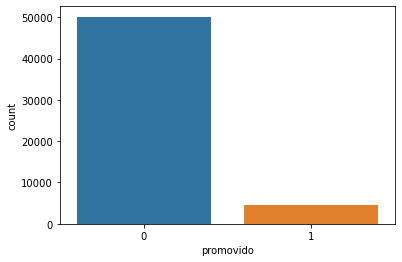

In [14]:
#caso real
sns.countplot(x = dadosRH['promovido'])

In [15]:
df_classe_majoritaria = dadosRH[dadosRH.promovido==0]
df_classe_minoritaria = dadosRH[dadosRH.promovido==1]

In [16]:
df_classe_majoritaria.shape

(50140, 11)

In [17]:
df_classe_minoritaria.shape

(4668, 11)

In [18]:
#upsample da classe minoritária - para balancear (mudar o real)
from sklearn.utils import resample
df_classe_minoritaria_upsampled = resample (df_classe_minoritaria,
                                           replace = True,
                                           n_samples = 50140,
                                           random_state = 150)

In [19]:
dadosRH_balanceados = pd.concat([df_classe_majoritaria, df_classe_minoritaria_upsampled])

In [20]:
dadosRH_balanceados.promovido.value_counts()

1    50140
0    50140
Name: promovido, dtype: int64

In [21]:
dadosRH_balanceados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100280 entries, 0 to 5869
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id_funcionario       100280 non-null  int64  
 1   departmento          100280 non-null  object 
 2   regiao               100280 non-null  object 
 3   educacao             100280 non-null  object 
 4   genero               100280 non-null  object 
 5   canal_recrutamento   100280 non-null  object 
 6   numero_treinamentos  100280 non-null  int64  
 7   idade                100280 non-null  int64  
 8   aval_ano_anterior    100280 non-null  float64
 9   tempo_servico        100280 non-null  int64  
 10  promovido            100280 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 9.2+ MB


##### Dados não representam a realidade mas é necessário para o machine learning

<AxesSubplot:xlabel='promovido', ylabel='count'>

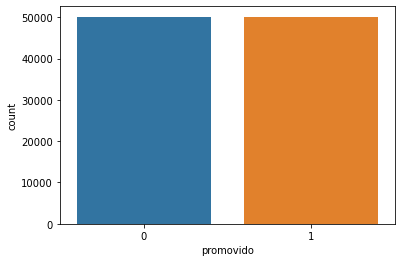

In [22]:
sns.countplot(x = dadosRH_balanceados['promovido'])

##### Dados salvos e carregados

In [23]:
dadosRH_balanceados.to_csv('dadosRH_modificado.csv', encoding = 'utf-8', index = False)

# Gráficosd para PowerBI
Os notebooks irão ter as importações necessárias para apenas copiar e colar para o PowerBI 

In [24]:
df = pd.read_csv('dadosRH_modificado.csv')
df

,id_funcionario,departmento,regiao,educacao,genero,canal_recrutamento,numero_treinamentos,idade,aval_ano_anterior,tempo_servico,promovido
0,65438,Marketing,Sudeste,Mestrado ou Doutorado,F,Outsourcing,1,35,5.0,8,0
1,65141,Logistica,Nordeste,Superior,M,Outro,1,30,5.0,4,0
2,7513,Marketing,Sudeste,Superior,M,Outsourcing,1,34,3.0,7,0
3,2542,Marketing,Norte,Superior,M,Outro,2,39,1.0,10,0
4,48945,Tecnologia,Nordeste,Superior,M,Outro,1,45,3.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
100275,17132,Analytics,Norte,Superior,M,Outro,1,27,3.0,1,1
100276,75177,Logistica,Sul,Superior,M,Outsourcing,2,47,5.0,6,1
100277,74185,Logistica,Norte2,Superior,M,Outsourcing,1,30,3.0,5,1
100278,5261,Contabilidade,Sul,Superior,M,Outsourcing,1,29,2.0,4,1


## 1 - Qual a correlação entre os atributos dos Funcionários?

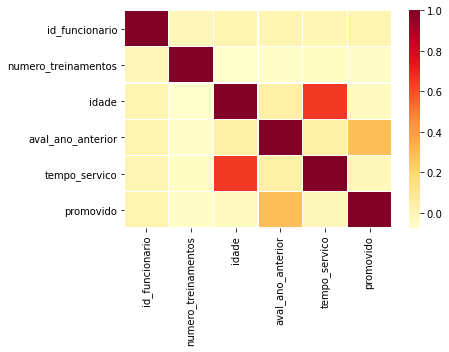

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.heatmap(corr, cmap = "YlOrRd", linewidths = 0.1)
plt.show()

## 2 - Qual é o tempo de serviço da maioria dos Funcionários?

In [26]:
df['tempo_servico'].value_counts().sort_values(ascending=False).to_frame()

,tempo_servico
3,12817
4,12609
2,12513
5,10465
7,10200
6,8690
1,8262
8,5495
9,4861
10,4198


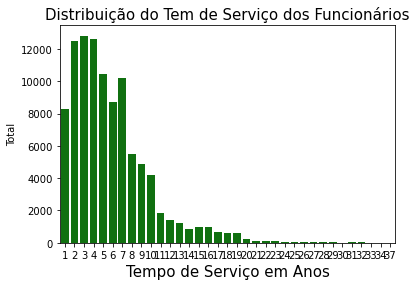

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x = df['tempo_servico'], color = 'green')
plt.title('Distribuição do Tem de Serviço dos Funcionários', fontsize = 15)
plt.xlabel('Tempo de Serviço em Anos', fontsize = 15)
plt.ylabel('Total')
plt.show()

## 3 - Qual a Avaliação do Ano Anterior Foi Mais Comum? 

In [28]:
df['aval_ano_anterior'].value_counts().sort_values(ascending = False).to_frame()

,aval_ano_anterior
3.0,39271
5.0,30658
4.0,17357
1.0,7013
2.0,5981


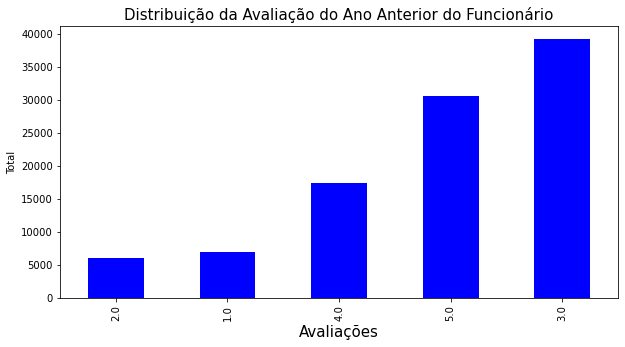

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
df['aval_ano_anterior'].value_counts().sort_values().plot.bar(color='blue', figsize = (10,5))
plt.title('Distribuição da Avaliação do Ano Anterior do Funcionário', fontsize = 15)
plt.xlabel('Avaliações', fontsize = 15)
plt.ylabel('Total')
plt.show()

## 4 - Qual a Distribuição das Idades dos Funcionários?

In [30]:
df['idade'].value_counts().sort_values(ascending=False).to_frame()

,idade
30,6839
31,6581
32,6438
29,6308
33,6245
28,6088
34,5929
35,5469
27,5368
36,4587


C:\Users\julio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


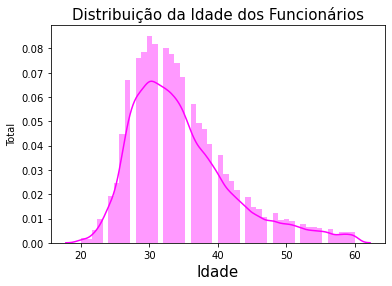

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(x = df['idade'], color = 'magenta')
plt.title('Distribuição da Idade dos Funcionários', fontsize = 15)
plt.xlabel('Idade', fontsize = 15)
plt.ylabel('Total')
plt.show()

## 5 - Qual o Número de Treinamentos Mais Frequentes?

In [32]:
df['numero_treinamentos'].value_counts().sort_values(ascending=False).to_frame()

,numero_treinamentos
1,82617
2,13761
3,2964
4,697
5,153
6,61
7,12
8,5
9,5
10,5


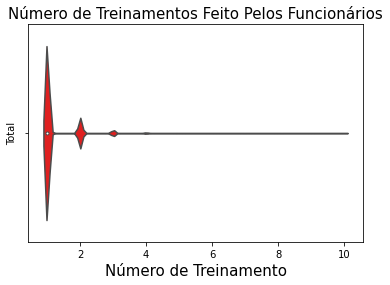

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.violinplot(x = df['numero_treinamentos'], color = 'red')
plt.title('Número de Treinamentos Feito Pelos Funcionários', fontsize = 15)
plt.xlabel('Número de Treinamento', fontsize = 15)
plt.ylabel('Total')
plt.show()

## 6 - Qual a Proporção de Funcionários Por Canal de Recrutamento?

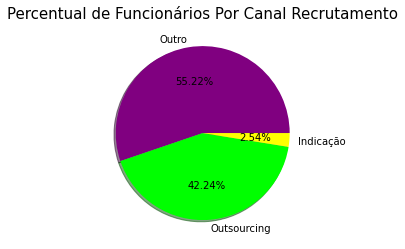

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
df['canal_recrutamento'].value_counts()
fatias = [55375,42358,2547]
labels = "Outro", "Outsourcing", "Indicação"
colors = ['purple', 'lime', 'yellow']
explode = [0,0,0]
plt.pie(fatias, labels = labels, colors=colors, explode=explode, shadow = True, autopct = "%.2f%%")
plt.axis('off')
plt.title('Percentual de Funcionários Por Canal Recrutamento', fontsize = 15)
plt.show()

## 7 - Qual a Relação Entre a Promoção e a Avaliação do Ano Anterior?

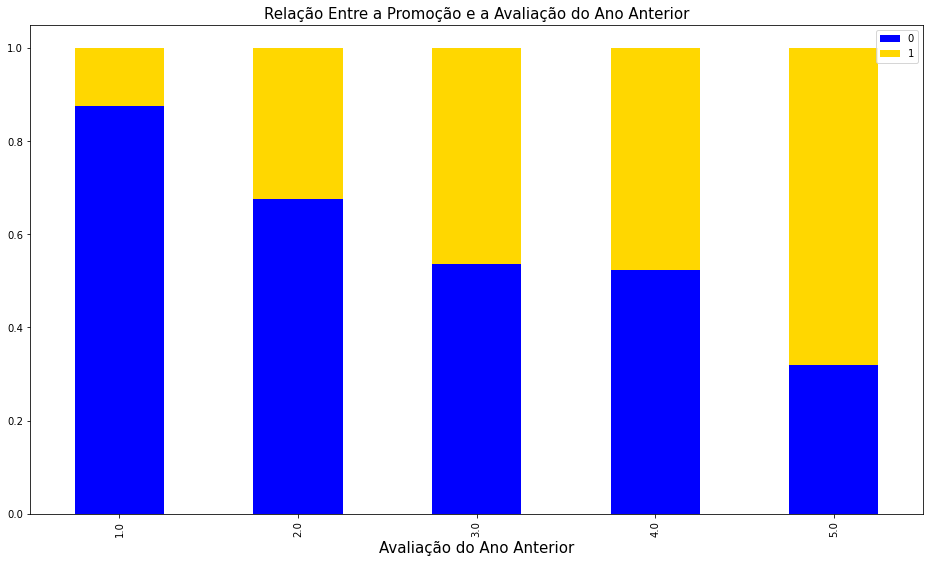

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.crosstab(df['aval_ano_anterior'], df['promovido'])
data.div(data.sum(1).astype(float), axis=0).plot(kind = 'bar',
                                                stacked = True,
                                                figsize = (16,9),
                                                color = ['blue','gold'])
plt.title('Relação Entre a Promoção e a Avaliação do Ano Anterior', fontsize = 15)
plt.xlabel('Avaliação do Ano Anterior', fontsize = 15)
plt.legend()
plt.show()

# The End